<h1 style="text-align:center">Titanic Dataset Model Training</h1>

<h2>Importing necessary libraries</h2>

In [1]:
#importing libraries
import numpy
import pandas as pd
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.model_selection import GridSearchCV

<h2>Importing the train Titanic dataset</h2>

In [403]:
#importing dataset
dataset = pd.read_csv('train.csv')
print(dataset.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


<h2>Preprocessing</h2>
This section is about data preprocessing

In [404]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h3>The number of empty or null data in datasets are</h3>

In [405]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<h3>The number of individuals that survived are:</h3>

In [406]:
dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


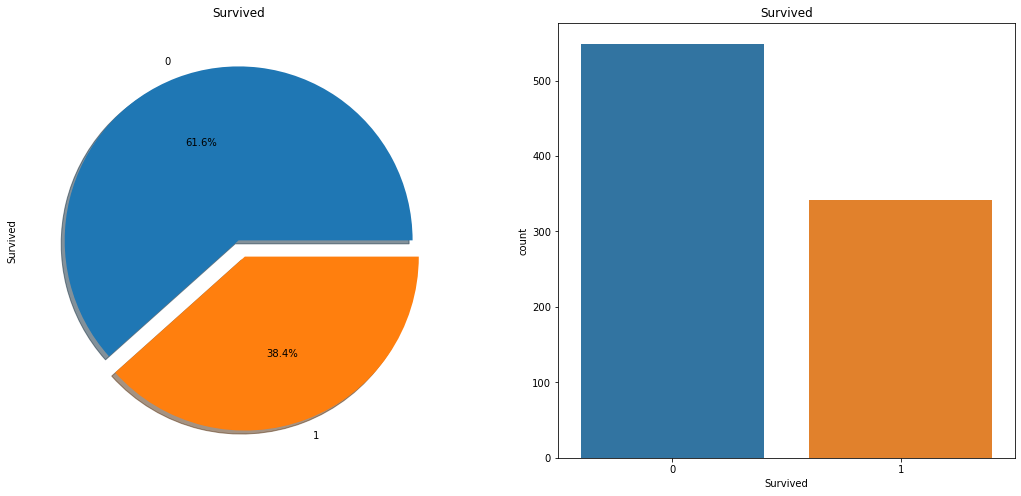

In [407]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
sns.countplot('Survived',data=dataset,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<h2 style="text-align:center">Catagorical data analysis</h2>

<h3>Total number of passengers abroad the ship based on gender:</h3>

In [408]:
dataset['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


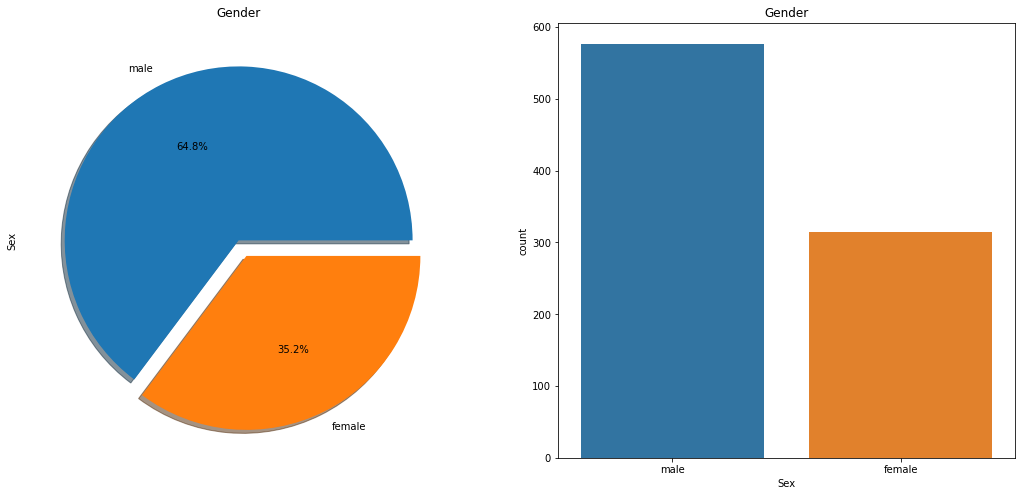

In [409]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Sex'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Gender')
sns.countplot('Sex',data=dataset,ax=ax[1])
ax[1].set_title('Gender')
plt.show()

<h3>The survival rates of passenger based on gender</h3>

In [410]:
dataset.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


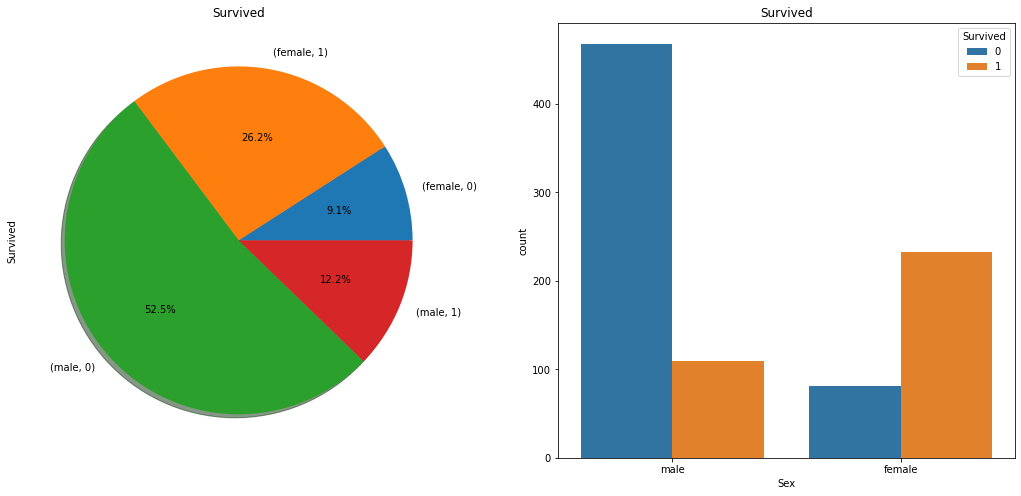

In [411]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset.groupby(['Sex','Survived'])['Survived'].count().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
sns.countplot('Sex',hue='Survived',data=dataset,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<h3>Creating new column i.e if they were travelling alone</h3>

In [412]:
dataset['Alone'] = dataset['SibSp'] + dataset['Parch']
dataset['Alone'] = dataset['Alone'].apply(lambda x: 0 if x > 0 else 1)
dataset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0


In [413]:
dataset['Alone'].value_counts()

1    537
0    354
Name: Alone, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


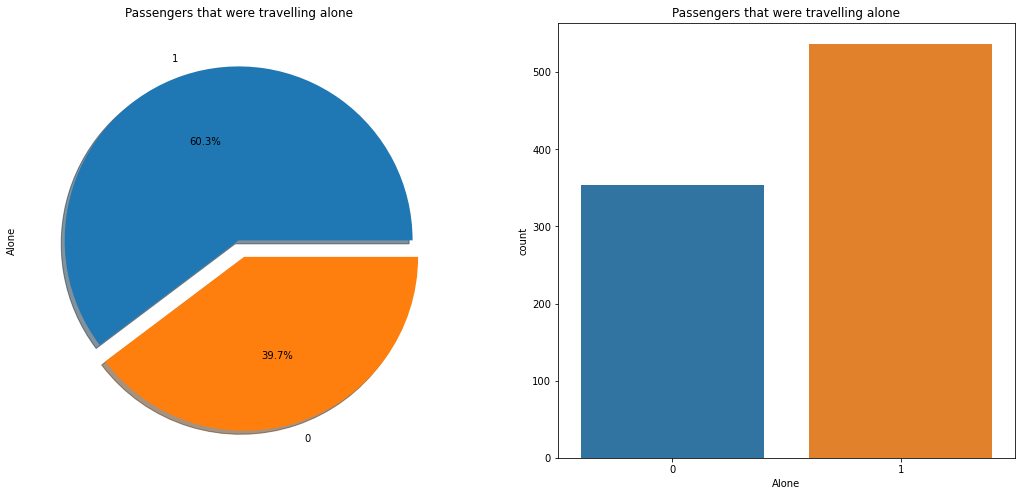

In [414]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Alone'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Passengers that were travelling alone')
sns.countplot('Alone',data=dataset,ax=ax[1])
ax[1].set_title('Passengers that were travelling alone')
plt.show()

<h3>The number of survivers that travelled alone</h3>

In [415]:
dataset.groupby(['Alone','Survived'])['Survived'].count()


Alone  Survived
0      0           175
       1           179
1      0           374
       1           163
Name: Survived, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


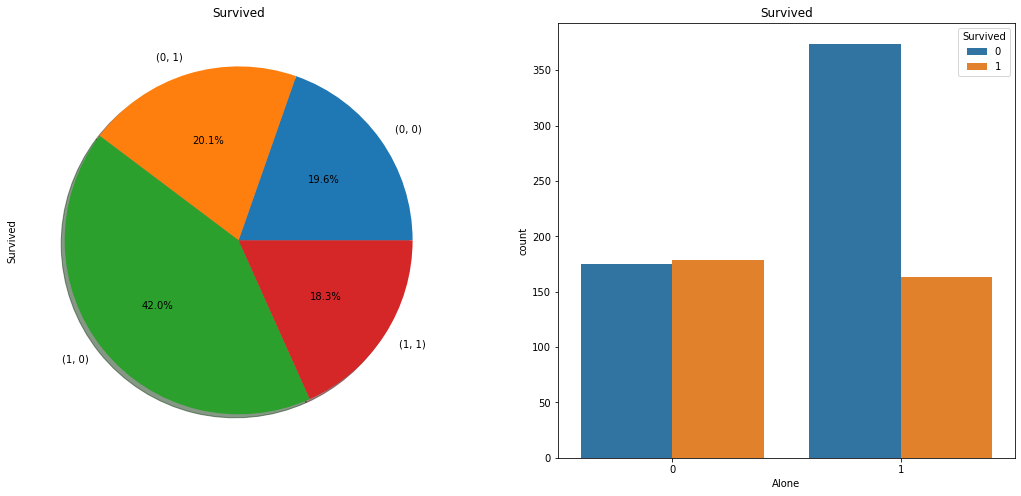

In [416]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset.groupby(['Alone','Survived'])['Survived'].count().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
sns.countplot('Alone',hue='Survived',data=dataset,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<h3>Creating a new column i.e Married or unmarried</h3>

In [417]:
def married(name):
    if 'Master.' in name:
        return 1
    if 'Mrs.' in name:
        return 1
    else:
        return 0

dataset['Married'] = dataset['Name'].apply(married)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Married
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0


In [418]:
dataset['Married'].value_counts()

0    726
1    165
Name: Married, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


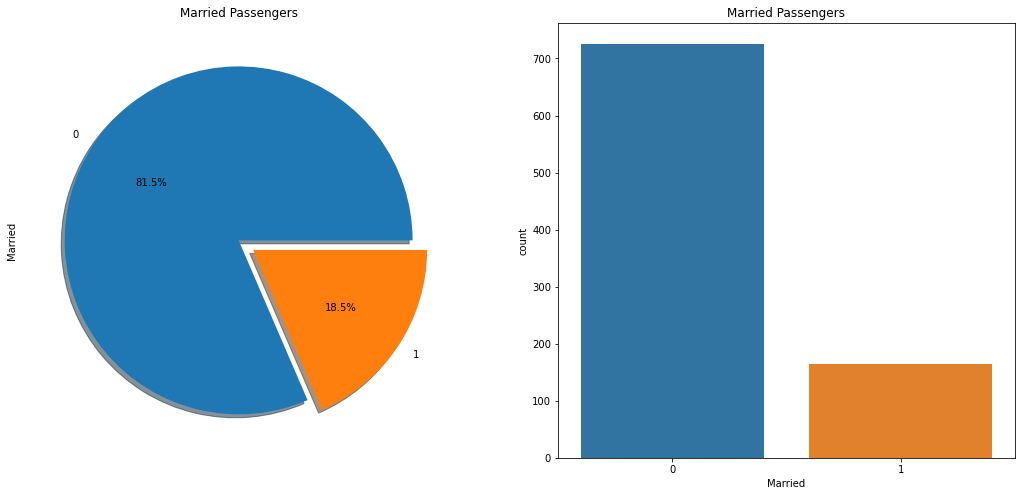

In [419]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Married'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Married Passengers')
sns.countplot('Married',data=dataset,ax=ax[1])
ax[1].set_title('Married Passengers')
plt.show()

<h3>Married vs Survived</h3>

In [420]:
dataset.groupby(['Married','Survived'])['Survived'].count()

Married  Survived
0        0           506
         1           220
1        0            43
         1           122
Name: Survived, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


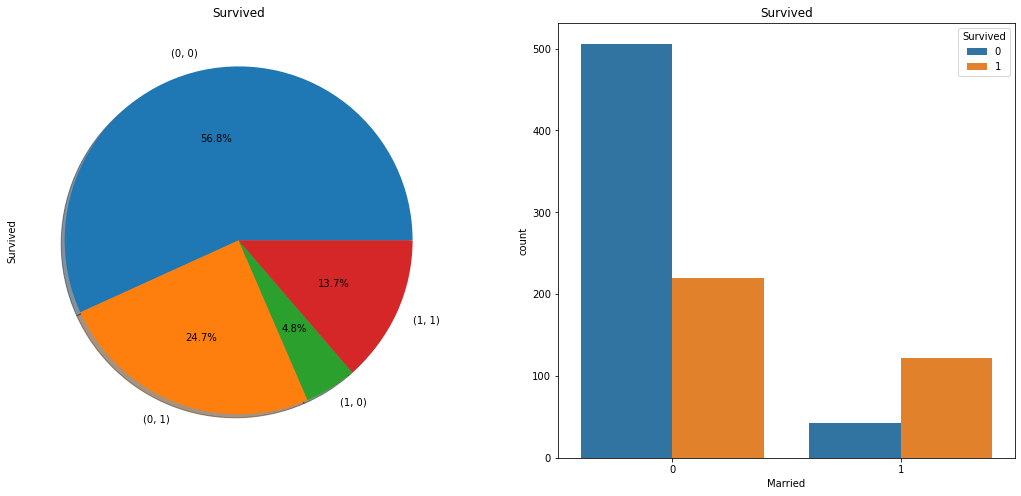

In [421]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset.groupby(['Married','Survived'])['Survived'].count().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
sns.countplot('Married',hue='Survived',data=dataset,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

<h2>Conclusion</h2>

<p>From the above analysis we can make the following assumptions:</p>
1)The Female passengers had a more chances of surviving incident, as more females survived <br>the incident even though the number of males abroad the ship was greater<br><br>
2)The passengers that were travelling with family or with siblings had more chances of surviving<br><br>
3)Married passenger had more chances of surviving
<br><br>
<b><i>The assumtion of married and sibling might be wrong</i></b>

In [422]:
dataset.groupby(['Alone','Married','Survived'])['Survived'].count()

Alone  Married  Survived
0      0        0           134
                1            75
       1        0            41
                1           104
1      0        0           372
                1           145
       1        0             2
                1            18
Name: Survived, dtype: int64

<h2 style="text-align:center">Ordinal data analysis</h2>


<h3>Based on passenger class</h3>

In [423]:
dataset['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

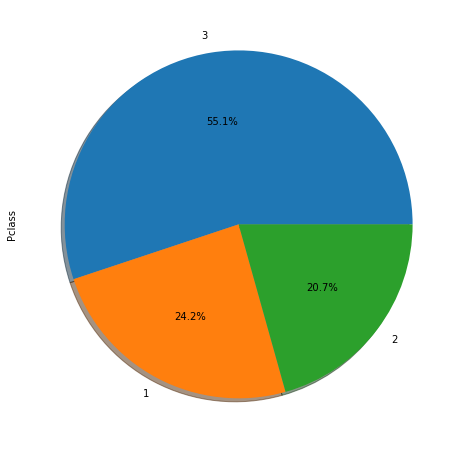

In [424]:
dataset['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(18,8))
plt.show()

<h3>Class vs Survived</h3>

In [425]:
dataset.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


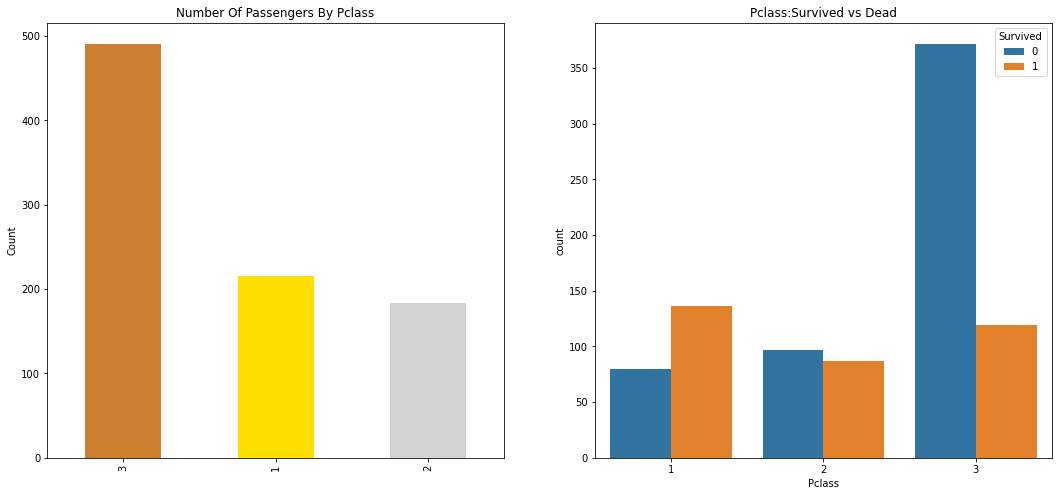

In [426]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=dataset,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

<h3>Embarked</h3>

The Embarked can be viewed as an Ordianal data as the route of the titanic ship was<br>

Southampton(England)->Cherbourbg(France)->Queenstown(Ireland)---(X)-->Newyork(USA)

<br> so we are changing S->1,C->2,Q->3

In [427]:
def embarked(emb):
    if emb == 'S':
        return 1
    if emb == 'C':
        return 2
    if emb == 'Q':
        return 3
    else: #for null data returning S i.e 1 as it has greatest value
        return 1

dataset['Embarked'] = dataset['Embarked'].apply(embarked)

In [428]:
dataset['Embarked'].value_counts()

1    646
2    168
3     77
Name: Embarked, dtype: int64

<h2>Changing the null data in Embarked</h2>

In [429]:
dataset['Embarked'].isnull().sum()

0

<h2>Graphical representation of embarked</h2>

In [430]:
dataset.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
1         0           427
          1           219
2         0            75
          1            93
3         0            47
          1            30
Name: Survived, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


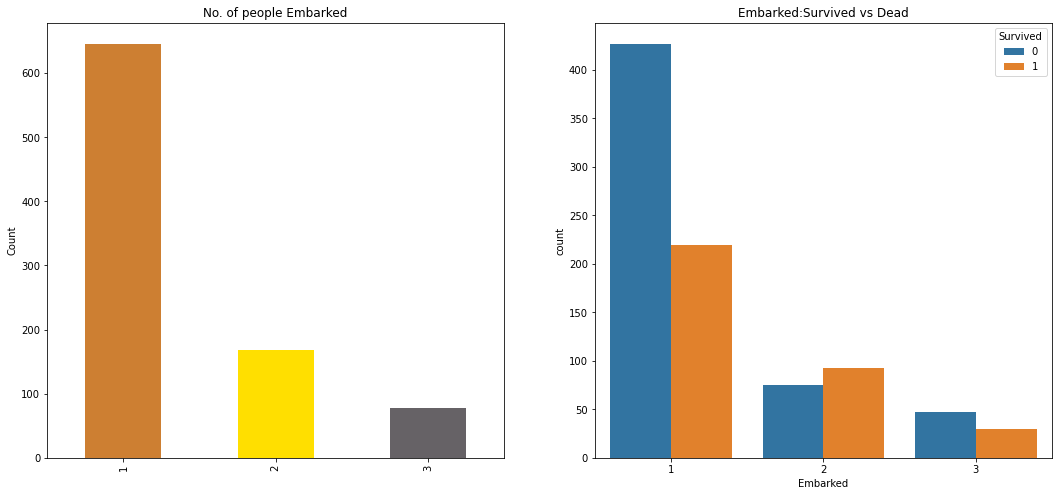

In [431]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Embarked'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#666266'],ax=ax[0])
ax[0].set_title('No. of people Embarked')
ax[0].set_ylabel('Count')
sns.countplot('Embarked',hue='Survived',data=dataset,ax=ax[1])
ax[1].set_title('Embarked:Survived vs Dead')
plt.show()

<p>The maximum number of people departed from port 1 i.e. Southampton, England and the same port has maximum number of surviors</p>
<p>Port B i.e Cherborg france has the maximum rate of ratio of surviors<p>
<p>The minimum number of people departed from port 3 i.e. Queensland, Ireland and had the most number of causlaties</p>
<i>This can because of the class where people embarked from</i>

In [432]:
dataset.groupby(['Embarked','Pclass'])['Pclass'].count()

Embarked  Pclass
1         1         129
          2         164
          3         353
2         1          85
          2          17
          3          66
3         1           2
          2           3
          3          72
Name: Pclass, dtype: int64

/home/sujen/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


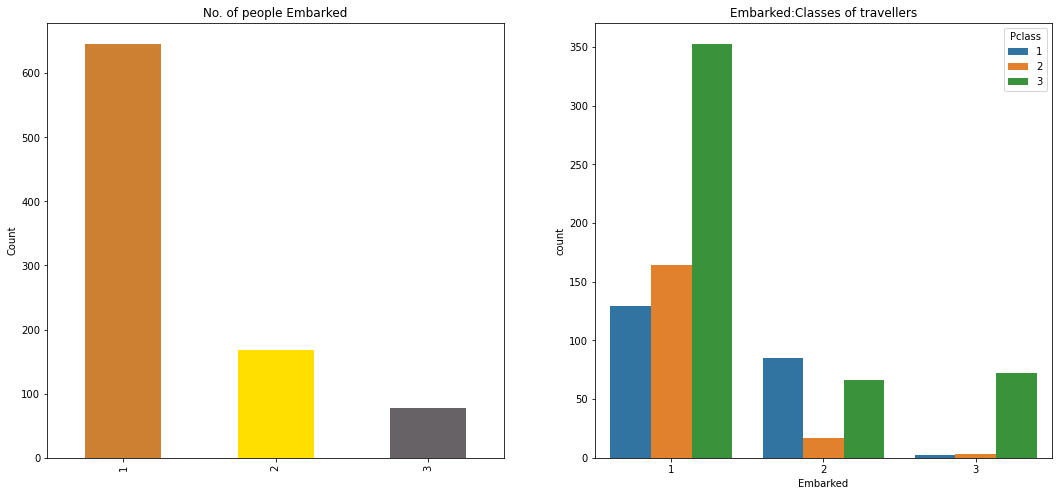

In [433]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Embarked'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#666266'],ax=ax[0])
ax[0].set_title('No. of people Embarked')
ax[0].set_ylabel('Count')
sns.countplot('Embarked',hue='Pclass',data=dataset,ax=ax[1])
ax[1].set_title('Embarked:Classes of travellers')
plt.show()

<p>The reason behind the survival rate of port 2 (i.e Cherborg, France) is the class of passenger as most of passenger are from Class 1 in port 3 </p>

<h2 style="text-align:center">Continous data analysis</h2>


<h3>The number of missing value in dataset is:</h3>

In [434]:
dataset['Age'].isnull().sum()

177

In [435]:
age_by_pclass_sex = dataset.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))

print('Median age of all passengers: {}'.format(dataset['Age'].median()))

dataset['Age'] = dataset.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [436]:
dataset['Age'].isnull().sum()


0

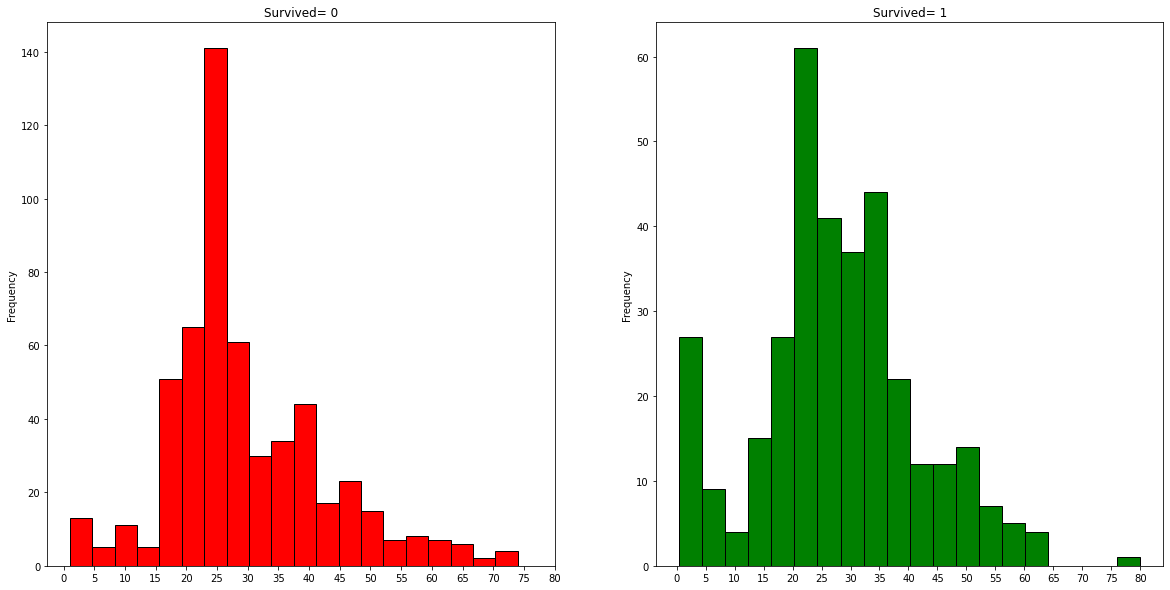

In [437]:
f,ax=plt.subplots(1,2,figsize=(20,10))
dataset[dataset['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
dataset[dataset['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

<h2>Observations</h2>
<ol>
<li>Most of the children(age< 5) were saved</li>
<li>The oldest passenger (age=80) was saved</li>
</ol>

<h2 style="text-align:center">Feature selection<h2>

In [438]:
dataset.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Alone,Married
PassengerId,1.000000,-0.005007,-0.035144,0.039033,-0.057527,-0.001652,0.012658,-0.030467,0.057462,-0.003887
Survived,-0.005007,1.000000,-0.338481,-0.059579,-0.035322,0.081629,0.257307,0.106811,-0.203367,0.348546
Pclass,-0.035144,-0.338481,1.000000,-0.413583,0.083081,0.018443,-0.549500,0.045702,0.135207,-0.089645
Age,0.039033,-0.059579,-0.413583,1.000000,-0.249854,-0.175526,0.122692,-0.056434,0.175529,-0.040933
SibSp,-0.057527,-0.035322,0.083081,-0.249854,1.000000,0.414838,0.159651,-0.059961,-0.584471,0.243028
Parch,-0.001652,0.081629,0.018443,-0.175526,0.414838,1.000000,0.216225,-0.078665,-0.583398,0.344434
Fare,0.012658,0.257307,-0.549500,0.122692,0.159651,0.216225,1.000000,0.062142,-0.271832,0.099871
Embarked,-0.030467,0.106811,0.045702,-0.056434,-0.059961,-0.078665,0.062142,1.000000,0.017807,-0.043793
Alone,0.057462,-0.203367,0.135207,0.175529,-0.584471,-0.583398,-0.271832,0.017807,1.000000,-0.469075
Married,-0.003887,0.348546,-0.089645,-0.040933,0.243028,0.344434,0.099871,-0.043793,-0.469075,1.000000


<h3>dropping unnecessary columns</h3>

<p>Since the Fare is the dependent upon the Class and embarked location we can drop fare</p>

In [439]:
dataset.drop('Fare', axis = 1, inplace = True)


SibSp and Parch is represented by Alone and married columns so

In [440]:
dataset.drop('SibSp', axis = 1, inplace = True)
dataset.drop('Parch', axis = 1, inplace = True)


PassengerId has no co-relation with survived passengers

In [441]:
dataset.drop('PassengerId', axis = 1, inplace = True)


Name and Cabin no co-relation with survived passengers

In [442]:
dataset.drop('Name',axis=1,inplace=True)

In [443]:
dataset.drop('Cabin',axis=1,inplace=True)

In [444]:
dataset.drop('Ticket',axis=1,inplace=True)

In [445]:
dataset.head()

,Survived,Pclass,Sex,Age,Embarked,Alone,Married
0,0,3,male,22.0,1,0,0
1,1,1,female,38.0,2,0,1
2,1,3,female,26.0,1,1,0
3,1,1,female,35.0,1,0,1
4,0,3,male,35.0,1,1,0


Changing male femlae to binary for model training


In [446]:
dataset['Sex'] = dataset['Sex'].apply(lambda x: 1 if x == 'female' else 0 )

In [447]:
embarked_df = pd.get_dummies(dataset['Embarked'])

In [448]:
dataset = pd.concat([dataset,embarked_df], axis = 1)


In [449]:
dataset.drop('Embarked', axis = 1, inplace = True)

In [450]:
dataset.head()

,Survived,Pclass,Sex,Age,Alone,Married,1,2,3
0,0,3,0,22.0,0,0,1,0,0
1,1,1,1,38.0,0,1,0,1,0
2,1,3,1,26.0,1,0,1,0,0
3,1,1,1,35.0,0,1,1,0,0
4,0,3,0,35.0,1,0,1,0,0


since features can't be in integer changing 1,2,3 back to C,Q,S

In [451]:
for i in range(1,4):
    dataset.rename(columns={i:f"port_{i}"},inplace=True)

In [452]:
dataset.head()

,Survived,Pclass,Sex,Age,Alone,Married,port_1,port_2,port_3
0,0,3,0,22.0,0,0,1,0,0
1,1,1,1,38.0,0,1,0,1,0
2,1,3,1,26.0,1,0,1,0,0
3,1,1,1,35.0,0,1,1,0,0
4,0,3,0,35.0,1,0,1,0,0


## Implementing machine learning model

In [453]:
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
nb = GaussianNB()
rfc =RandomForestClassifier()

models = {'svc':svc, 'knn':knn, 'dtc':dtc, 'nb':nb, 'rfc':rfc}

x = dataset.drop('Survived', axis = 1)
y = dataset['Survived']


In [454]:
x.shape

(891, 8)

In [455]:
y.shape

(891,)

In [456]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [457]:
model_accuracy = {}
for model in models.keys():
    mod = models[model].fit(x_train, y_train)
    predict = mod.predict(x_test)
    print(f"{model}")
    print(confusion_matrix(predict,y_test))
    if model not in model_accuracy.keys():
        model_accuracy.update({model:accuracy_score(y_test, predict)})

svc
[[100  67]
 [  6   6]]
knn
[[89 34]
 [17 39]]
dtc
[[90 23]
 [16 50]]
nb
[[79 25]
 [27 48]]
rfc
[[86 21]
 [20 52]]


In [458]:
model_accuracy


{'svc': 0.5921787709497207,
 'knn': 0.7150837988826816,
 'dtc': 0.7821229050279329,
 'nb': 0.7094972067039106,
 'rfc': 0.770949720670391}

Decision tree classifier had the highest accuracy

In [459]:
params = {
    
        'criterion':['gini','entropy'],
        'max_depth':[2,4,6,8,10,12,14,15,20]
    }

In [460]:
dtree_model = GridSearchCV(dtc,
    params,
    verbose=1, #Progress bar showing
    cv=20, #cross validation
    n_jobs=-1, #cores to assign
)
#fit model to data
dtree_model.fit(x_train, y_train)
print(dtree_model.best_params_)
print(dtree_model.best_score_)



Fitting 20 folds for each of 18 candidates, totalling 360 fits
{'criterion': 'entropy', 'max_depth': 4}
0.8344444444444445


<h3>Saving model</h3>

In [463]:
dtc_pickle=open('decision_tree_acc_84.pickle','wb')


In [464]:
pickle.dump(dtree_model,dtc_pickle)

In [465]:
dtc_pickle.close()